# Introducción al Aprendizaje Automático &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; UANL - FCFM
---
## Modelos de ensamble, SVM y Redes neuronales para datos del titanic

**Alumnos**
- Ian Mauricio Saucedo Alemán &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1868954
- Sebastian Ibarra Rodriguez  &nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1858846
- Andrés Isaac Montes Bartolo&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1854017
- Marco Antonio Vázquez Rivera&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1678576

# Leer y limpiar datos

En esta seccion, leemos y limpiamos los datos del dataset titanic para su correcto uso en los modelos. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df_data_train = pd.read_excel('/content/titanic_train.xlsx')

In [ ]:
df_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S
1,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
2,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
3,523,0,3,"Lahoud, Mr. Sarkis",male,NaN,0,0,2624,7.2250,NaN,C
4,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q


In [ ]:
df_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 67.0+ KB


Se puede observar que en los datos de entrenamiento se encuentran valores nulos. 

In [ ]:
df_data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            141
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          554
Embarked         2
dtype: int64

In [ ]:
df_data_train.mean()

PassengerId    443.504909
Survived         0.380084
Pclass           2.312763
Age             29.348199
SibSp            0.537167
Parch            0.394109
Fare            31.730329
dtype: float64

In [ ]:
df_data_train['Embarked'].value_counts()

S    510
C    139
Q     62
Name: Embarked, dtype: int64

Aqui nos encargamos de los valores nulos en nuestros datos, en edad se cambian por la edad de 29, la cual es el promedio de edad sin quitar nulos, esto se hace con afan de no afectar tanto a nuestros datos con este cambio. En el numero de cabina llenamos los valores nulos con un valor que hemos declarado como MV (Missing Value). En el puerto de embarque solo hay dos valores nulos, por lo que optamos por asignarlos al puerto C. 

In [ ]:
df_data_train['Age'] = df_data_train['Age'].fillna(29)
df_data_train['Cabin'] = df_data_train['Cabin'].fillna('MV')
df_data_train['Embarked'] = df_data_train['Embarked'].fillna('C')
df_data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df_data_test = pd.read_excel('/content/titanic_val.xlsx')

In [ ]:
df_data_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
3,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
4,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


In [ ]:
df_data_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             36
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          133
Embarked         0
dtype: int64

In [ ]:
df_data_test.mean()

PassengerId    455.994382
Survived         0.398876
Pclass           2.292135
Age             31.112676
SibSp            0.466292
Parch            0.331461
Fare            34.102387
dtype: float64

Hacemos el mismo procedimiento para los datos de prueba. 

In [ ]:
df_data_test['Age'] = df_data_test['Age'].fillna(31)
df_data_test['Cabin'] = df_data_test['Cabin'].fillna('MV')
df_data_test['Embarked'] = df_data_test['Embarked'].fillna('C')
df_data_test.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

En esta parte estandarizamos nuestros datos, al: 
- Eliminar columnas que no nos serviran para la predicción 
- Otorgamos labels numericos a la columna de sexo 
- Asignamos dummies a las columnas del puerto de embarque y clase  
- Estandarizamos nuestros datos con StandarScaler 

In [ ]:
label = LabelEncoder()
scaler = StandardScaler()
def clean_titanic_data(data): 
  X = data.drop(labels=['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name'], axis = 1)
  y = data['Survived']
  X['Sex'] = label.fit_transform(X['Sex'])
  dict_sex = {x:y for x,y in enumerate(label.classes_)}
  X = pd.get_dummies(X, drop_first=True, columns=['Embarked', 'Pclass'])
  columns = X.columns
  print(X.head())
  X = scaler.fit_transform(X)
  return X , y, columns

x_train, y_train, columns_train = clean_titanic_data(df_data_train)
x_test, y_test, columns_test = clean_titanic_data(df_data_test)

   Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0    1  28.0      0      1  33.0000           0           1         1         0
1    1  29.0      0      0   7.8958           0           1         0         1
2    1   6.0      0      1  12.4750           0           1         0         1
3    1  29.0      0      0   7.2250           0           0         0         1
4    0  29.0      0      0   7.7500           1           0         0         1
   Sex   Age  SibSp  Parch  ...  Embarked_Q  Embarked_S  Pclass_2  Pclass_3
0    0  38.0      1      0  ...           0           0         0         0
1    0  35.0      1      0  ...           0           1         0         0
2    1  20.0      0      0  ...           0           1         0         1
3    1  19.0      3      2  ...           0           1         0         0
4    1  31.0      0      0  ...           0           1         0         1

[5 rows x 9 columns]


Podemos verificar que nuestros datos estan estandarizados

In [ ]:
x_train.mean(axis=0).round(2),x_train.var(axis=0)

(array([-0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Para nuestra facilidad, definiremos una funcion que realizara cortes en los modelos para obtener distintas metricas. 

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, confusion_matrix
def cuts(y_pred_raw): 
  precision_list = []
  accuracy_list = []
  recall_list = []
  f1_list = []
  cut_list = []
  for cut in [x/1000 for x in range(1001)]:
    y_pred = [1 if x[1]>= cut else 0 for x in y_pred_raw]
    cut_list.append(cut)
    accuracy_list.append(accuracy_score(y_test,y_pred))
    precision_list.append(precision_score(y_test,y_pred))
    recall_list.append(recall_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred))
  df_metrics = pd.DataFrame({'Cut':cut_list,
                           'Accuracy':accuracy_list,
                           'Recall':recall_list,
                           'Precision':precision_list,
                           'F1':f1_list})
  return df_metrics

# Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

Creamos variables para los hiperparámetros de profundidad máxima y para el número de árboles

In [ ]:
max_depth=4
n_estimators=500

##Caso 1: Profundidad máxima=4, Número de árboles=500

En esta seccion realizaremos una clasificacion mediante random forest con la librería sklearn 

In [ ]:
# Instanciamos y usamos nuestro modelo de Random forest classifier 
model_rf = RandomForestClassifier(max_depth= max_depth, n_estimators=n_estimators)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Ya con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba 

In [ ]:
y_pred_raw = model_rf.predict_proba(x_test)

Se obtienen los cortes

In [ ]:
df_metrics_rf = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Ya podemos buscar entre nuestros cortes los modelos donde, por ejemplo, el accuracy y precision tengan un buen valor. 

In [ ]:
df_metrics_rf.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
404,0.404,0.848315,0.746479,0.854839,0.796992
394,0.394,0.848315,0.774648,0.833333,0.802920
395,0.395,0.848315,0.774648,0.833333,0.802920
396,0.396,0.848315,0.774648,0.833333,0.802920
397,0.397,0.848315,0.774648,0.833333,0.802920
439,0.439,0.842697,0.676056,0.905660,0.774194
440,0.440,0.842697,0.676056,0.905660,0.774194
416,0.416,0.842697,0.718310,0.864407,0.784615
417,0.417,0.842697,0.718310,0.864407,0.784615
405,0.405,0.842697,0.732394,0.852459,0.787879


Tambien podemos visualizar las importancias de las columnas de nuestro dataset en el modelo aplicado. 

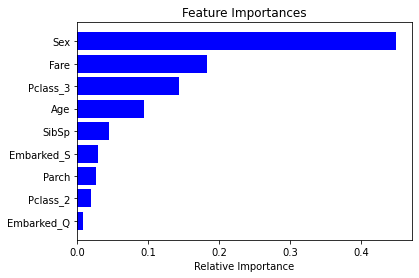

In [ ]:
features = columns_train
importances = model_rf.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df_importance.round(3)

,Feature,Importance
5,Embarked_Q,0.009
7,Pclass_2,0.020
3,Parch,0.027
6,Embarked_S,0.030
2,SibSp,0.045
1,Age,0.095
8,Pclass_3,0.143
4,Fare,0.183
0,Sex,0.449


##Caso 2: Profundidad máxima=6, Número de árboles=500

In [ ]:
max_depth=6
n_estimators=500

En esta seccion realizaremos una clasificacion mediante random forest con la librería sklearn 

In [ ]:
# Instanciamos y usamos nuestro modelo de Random forest classifier 
model_rf = RandomForestClassifier(max_depth= max_depth, n_estimators=n_estimators)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Ya con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba 

In [ ]:
y_pred_raw = model_rf.predict_proba(x_test)

Se obtienen los cortes

In [ ]:
df_metrics_rf = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Ya podemos buscar entre nuestros cortes los modelos donde, por ejemplo, el accuracy y precision tengan un buen valor. 

In [ ]:
df_metrics_rf.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
422,0.422,0.837079,0.690141,0.875,0.771654
423,0.423,0.837079,0.690141,0.875,0.771654
424,0.424,0.837079,0.690141,0.875,0.771654
425,0.425,0.837079,0.690141,0.875,0.771654
426,0.426,0.837079,0.690141,0.875,0.771654
427,0.427,0.837079,0.690141,0.875,0.771654
428,0.428,0.837079,0.690141,0.875,0.771654
429,0.429,0.837079,0.690141,0.875,0.771654
430,0.430,0.837079,0.690141,0.875,0.771654
431,0.431,0.837079,0.690141,0.875,0.771654


Tambien podemos visualizar las importancias de las columnas de nuestro dataset en el modelo aplicado. 

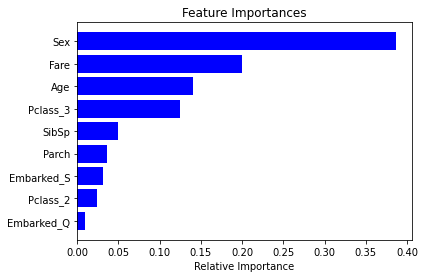

In [ ]:
features = columns_train
importances = model_rf.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df_importance.round(3)

,Feature,Importance
5,Embarked_Q,0.010
7,Pclass_2,0.023
6,Embarked_S,0.031
3,Parch,0.036
2,SibSp,0.049
8,Pclass_3,0.124
1,Age,0.140
4,Fare,0.199
0,Sex,0.387


##Caso 3: Profundidad máxima=4, Número de árboles=350

In [ ]:
max_depth=4
n_estimators=350

En esta seccion realizaremos una clasificacion mediante random forest con la librería sklearn 

In [ ]:
# Instanciamos y usamos nuestro modelo de Random forest classifier 
model_rf = RandomForestClassifier(max_depth= max_depth, n_estimators=n_estimators)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Ya con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba 

In [ ]:
y_pred_raw = model_rf.predict_proba(x_test)

Se obtienen los cortes

In [ ]:
df_metrics_rf = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Ya podemos buscar entre nuestros cortes los modelos donde, por ejemplo, el accuracy y precision tengan un buen valor. 

In [ ]:
df_metrics_rf.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
395,0.395,0.837079,0.746479,0.828125,0.785185
396,0.396,0.837079,0.746479,0.828125,0.785185
377,0.377,0.837079,0.774648,0.808824,0.791367
378,0.378,0.837079,0.774648,0.808824,0.791367
379,0.379,0.837079,0.774648,0.808824,0.791367
380,0.380,0.837079,0.774648,0.808824,0.791367
365,0.365,0.837079,0.788732,0.800000,0.794326
366,0.366,0.837079,0.788732,0.800000,0.794326
435,0.435,0.831461,0.676056,0.872727,0.761905
436,0.436,0.831461,0.676056,0.872727,0.761905


Tambien podemos visualizar las importancias de las columnas de nuestro dataset en el modelo aplicado. 

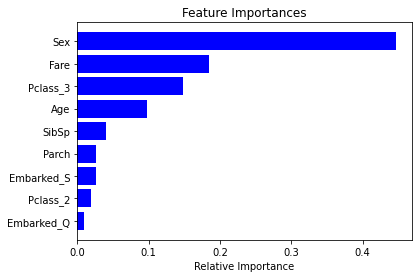

In [ ]:
features = columns_train
importances = model_rf.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df_importance.round(3)

,Feature,Importance
5,Embarked_Q,0.009
7,Pclass_2,0.019
6,Embarked_S,0.026
3,Parch,0.027
2,SibSp,0.041
1,Age,0.097
8,Pclass_3,0.149
4,Fare,0.185
0,Sex,0.447


# Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Creamos variables para los hiperparámetros de profundidad máxima y para el mínimo de muestras necesarias para dividir un nodo

In [ ]:
max_depth=2
min_samples_split=2

##Caso 1: Profundidad máxima=2, Mínimo de muestras para dividir el nodo=2

En esta seccion realizaremos una classificacion mediante Gradient Boosting con la libreria sklearn 

In [ ]:
# Instanciamos y usamos nuestro modelo Gradient Boosting Classifier 
model_gb =GradientBoostingClassifier(learning_rate=0.8,
     max_depth=max_depth, random_state=0, min_samples_split=min_samples_split)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.8, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba. 

In [ ]:
y_pred_raw = model_gb.predict_proba(x_test)
df_metrics_gd = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_gd.sort_values(by=['Precision', 'Recall'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
999,0.999,0.612360,0.028169,1.000000,0.054795
985,0.985,0.719101,0.309859,0.956522,0.468085
986,0.986,0.719101,0.309859,0.956522,0.468085
987,0.987,0.719101,0.309859,0.956522,0.468085
988,0.988,0.719101,0.309859,0.956522,0.468085
989,0.989,0.719101,0.309859,0.956522,0.468085
990,0.990,0.719101,0.309859,0.956522,0.468085
991,0.991,0.719101,0.309859,0.956522,0.468085
992,0.992,0.707865,0.281690,0.952381,0.434783
993,0.993,0.691011,0.239437,0.944444,0.382022


Tambien podemos visualizar las importancias de cada columna para nuestro modelo. 

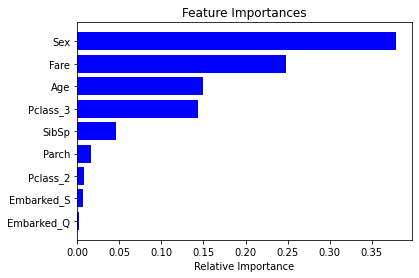

In [ ]:
features = columns_train
importances = model_gb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

##Caso 2: Profundidad máxima=4, Mínimo de muestras para dividir el nodo=2

In [ ]:
max_depth=4
min_samples_split=2

En esta seccion realizaremos una classificacion mediante Gradient Boosting con la libreria sklearn 

In [ ]:
# Instanciamos y usamos nuestro modelo Gradient Boosting Classifier 
model_gb =GradientBoostingClassifier(learning_rate=0.8,
     max_depth=max_depth, random_state=0, min_samples_split=min_samples_split)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.8, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba. 

In [ ]:
y_pred_raw = model_gb.predict_proba(x_test)
df_metrics_gd = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_gd.sort_values(by=['Precision', 'Recall'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
999,0.999,0.719101,0.309859,0.956522,0.468085
998,0.998,0.730337,0.352113,0.925926,0.510204
989,0.989,0.775281,0.478873,0.918919,0.629630
990,0.990,0.775281,0.478873,0.918919,0.629630
991,0.991,0.775281,0.478873,0.918919,0.629630
992,0.992,0.764045,0.450704,0.914286,0.603774
993,0.993,0.764045,0.450704,0.914286,0.603774
994,0.994,0.758427,0.436620,0.911765,0.590476
968,0.968,0.797753,0.549296,0.906977,0.684211
969,0.969,0.797753,0.549296,0.906977,0.684211


Tambien podemos visualizar las importancias de cada columna para nuestro modelo. 

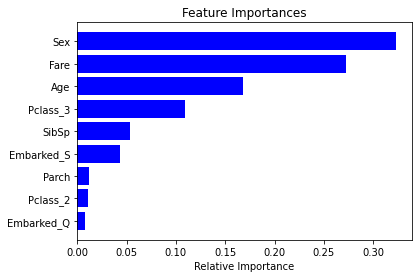

In [ ]:
features = columns_train
importances = model_gb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

##Caso 3: Profundidad máxima=2, Mínimo de muestras para dividir el nodo=5

In [ ]:
max_depth=2
min_samples_split=5

En esta seccion realizaremos una classificacion mediante Gradient Boosting con la libreria sklearn 

In [ ]:
# Instanciamos y usamos nuestro modelo Gradient Boosting Classifier 
model_gb =GradientBoostingClassifier(learning_rate=0.8,
     max_depth=max_depth, random_state=0, min_samples_split=min_samples_split)
model_gb.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.8, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba. 

In [ ]:
y_pred_raw = model_gb.predict_proba(x_test)
df_metrics_gd = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_gd.sort_values(by=['Precision', 'Recall'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
999,0.999,0.612360,0.028169,1.000000,0.054795
985,0.985,0.719101,0.309859,0.956522,0.468085
986,0.986,0.719101,0.309859,0.956522,0.468085
987,0.987,0.719101,0.309859,0.956522,0.468085
988,0.988,0.719101,0.309859,0.956522,0.468085
989,0.989,0.719101,0.309859,0.956522,0.468085
990,0.990,0.719101,0.309859,0.956522,0.468085
991,0.991,0.719101,0.309859,0.956522,0.468085
992,0.992,0.707865,0.281690,0.952381,0.434783
993,0.993,0.691011,0.239437,0.944444,0.382022


Tambien podemos visualizar las importancias de cada columna para nuestro modelo. 

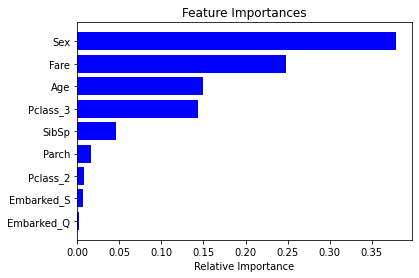

In [ ]:
features = columns_train
importances = model_gb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost 

In [ ]:
import xgboost as xgb

Creamos variables para los hiperparámetros de profundidad máxima y para el número de árboles

In [ ]:
max_depth=2
n_estimators=150

##Caso 1: Profundidad máxima=2, Número de árboles=150

En esta seccion realizaremos una classificacion con XGBoost con la libreria xgboost

In [ ]:
# Instanciamos y usamos nuestro modelo de XGBoost Classifier 
model_xgb = xgb.XGBClassifier(
    n_estimators=n_estimators,
    reg_lambda=1,
    gamma=0,
    max_depth=max_depth
)

In [ ]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Ya con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba. 

In [ ]:
y_pred_raw = model_xgb.predict_proba(x_test)
df_metrics_xgb = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_xgb.sort_values(by=['F1'], ascending=False)

,Cut,Accuracy,Recall,Precision,F1
290,0.290,0.848315,0.830986,0.797297,0.813793
279,0.279,0.848315,0.830986,0.797297,0.813793
277,0.277,0.848315,0.830986,0.797297,0.813793
276,0.276,0.848315,0.830986,0.797297,0.813793
275,0.275,0.848315,0.830986,0.797297,0.813793
...,...,...,...,...,...
988,0.988,0.601124,0.000000,0.000000,0.000000
987,0.987,0.601124,0.000000,0.000000,0.000000
986,0.986,0.601124,0.000000,0.000000,0.000000
985,0.985,0.601124,0.000000,0.000000,0.000000


Tambien podemos visualizar las importancias de cada columna en nuestro modelo. 

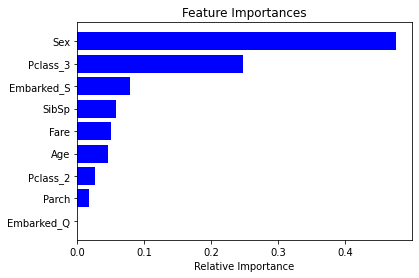

In [ ]:
features = columns_train
importances = model_xgb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

##Caso 2: Profundidad máxima=3, Número de árboles=150

In [ ]:
max_depth=3
n_estimators=150

En esta seccion realizaremos una classificacion con XGBoost con la libreria xgboost

In [ ]:
# Instanciamos y usamos nuestro modelo de XGBoost Classifier 
model_xgb = xgb.XGBClassifier(
    n_estimators=n_estimators,
    reg_lambda=1,
    gamma=0,
    max_depth=max_depth
)

In [ ]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Ya con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba. 

In [ ]:
y_pred_raw = model_xgb.predict_proba(x_test)
df_metrics_xgb = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_xgb.sort_values(by=['F1'], ascending=False)

,Cut,Accuracy,Recall,Precision,F1
284,0.284,0.842697,0.802817,0.802817,0.802817
316,0.316,0.848315,0.760563,0.843750,0.800000
315,0.315,0.848315,0.760563,0.843750,0.800000
462,0.462,0.859551,0.704225,0.925926,0.800000
464,0.464,0.859551,0.704225,0.925926,0.800000
...,...,...,...,...,...
996,0.996,0.601124,0.000000,0.000000,0.000000
997,0.997,0.601124,0.000000,0.000000,0.000000
998,0.998,0.601124,0.000000,0.000000,0.000000
999,0.999,0.601124,0.000000,0.000000,0.000000


Tambien podemos visualizar las importancias de cada columna en nuestro modelo. 

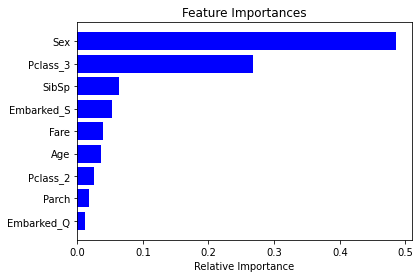

In [ ]:
features = columns_train
importances = model_xgb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

##Caso 3: Profundidad máxima=2, Número de árboles=300

In [ ]:
max_depth=2
n_estimators=300

En esta seccion realizaremos una classificacion con XGBoost con la libreria xgboost

In [ ]:
# Instanciamos y usamos nuestro modelo de XGBoost Classifier 
model_xgb = xgb.XGBClassifier(
    n_estimators=n_estimators,
    reg_lambda=1,
    gamma=0,
    max_depth=max_depth
)

In [ ]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Ya con nuestro modelo podemos intentar predecir los valores para nuestro conjunto de prueba. 

In [ ]:
y_pred_raw = model_xgb.predict_proba(x_test)
df_metrics_xgb = cuts(y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
df_metrics_xgb.sort_values(by=['F1'], ascending=False)

,Cut,Accuracy,Recall,Precision,F1
409,0.409,0.853933,0.732394,0.881356,0.8
404,0.404,0.853933,0.732394,0.881356,0.8
401,0.401,0.853933,0.732394,0.881356,0.8
402,0.402,0.853933,0.732394,0.881356,0.8
403,0.403,0.853933,0.732394,0.881356,0.8
...,...,...,...,...,...
995,0.995,0.601124,0.000000,0.000000,0.0
994,0.994,0.601124,0.000000,0.000000,0.0
993,0.993,0.601124,0.000000,0.000000,0.0
992,0.992,0.601124,0.000000,0.000000,0.0


Tambien podemos visualizar las importancias de cada columna en nuestro modelo. 

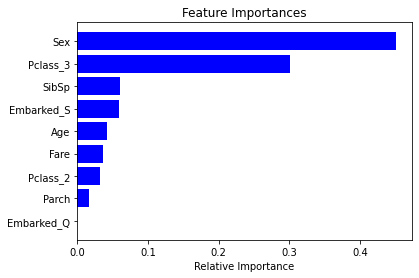

In [ ]:
features = columns_train
importances = model_xgb.feature_importances_
df_importance = pd.DataFrame({'Feature':features,'Importance':importances}).sort_values(by=['Importance'],ascending=True)
plt.title('Feature Importances')
plt.barh(range(len(df_importance)), df_importance['Importance'], color='b', align='center')
plt.yticks(range(len(df_importance)), df_importance['Feature'])
plt.xlabel('Relative Importance')
plt.show()

#SVM

In [ ]:
from sklearn.svm import SVC

Creamos variables para los hiperparámetros de número máximo de iteraciones y para la tolerancia

In [ ]:
max_iter=-1
tol=1e-3

##Caso 1: Número máximo de iteraciones=infinito, Tolerancia=1e-3

Definimos nuestro modelo con los datos de entrenamiento

In [ ]:
model_svm = SVC(tol=tol,gamma='auto', kernel='rbf',probability=True,max_iter=max_iter)
model_svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Hacemos las predicciones y mostramos los cortes ordenados por Accuracy y Precision

In [ ]:
y_pred_raw = model_svm.predict_proba(x_test)
df_metrics_svm = cuts(y_pred_raw)
df_metrics_svm.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Cut,Accuracy,Recall,Precision,F1
523,0.523,0.831461,0.647887,0.901961,0.754098
524,0.524,0.831461,0.647887,0.901961,0.754098
525,0.525,0.831461,0.647887,0.901961,0.754098
526,0.526,0.831461,0.647887,0.901961,0.754098
527,0.527,0.831461,0.647887,0.901961,0.754098
528,0.528,0.831461,0.647887,0.901961,0.754098
529,0.529,0.831461,0.647887,0.901961,0.754098
530,0.530,0.831461,0.647887,0.901961,0.754098
531,0.531,0.831461,0.647887,0.901961,0.754098
532,0.532,0.831461,0.647887,0.901961,0.754098


##Caso 2: Número máximo de iteraciones=infinito, Tolerancia=1e-4

In [ ]:
max_iter=-1
tol=1e-4

Definimos nuestro modelo con los datos de entrenamiento

In [ ]:
model_svm = SVC(tol=tol,gamma='auto', kernel='rbf',probability=True,max_iter=max_iter)
model_svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)

Hacemos las predicciones y mostramos los cortes ordenados por Accuracy y Precision

In [ ]:
y_pred_raw = model_svm.predict_proba(x_test)
df_metrics_svm = cuts(y_pred_raw)
df_metrics_svm.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Cut,Accuracy,Recall,Precision,F1
527,0.527,0.831461,0.647887,0.901961,0.754098
528,0.528,0.831461,0.647887,0.901961,0.754098
529,0.529,0.831461,0.647887,0.901961,0.754098
530,0.530,0.831461,0.647887,0.901961,0.754098
531,0.531,0.831461,0.647887,0.901961,0.754098
532,0.532,0.831461,0.647887,0.901961,0.754098
533,0.533,0.831461,0.647887,0.901961,0.754098
534,0.534,0.831461,0.647887,0.901961,0.754098
535,0.535,0.831461,0.647887,0.901961,0.754098
536,0.536,0.831461,0.647887,0.901961,0.754098


##Caso 3: Número máximo de iteraciones=25, Tolerancia=1e-3

In [ ]:
max_iter=25
tol=1e-3

Definimos nuestro modelo con los datos de entrenamiento

In [ ]:
model_svm = SVC(tol=tol,gamma='auto', kernel='rbf',probability=True,max_iter=max_iter)
model_svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=25).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=25, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Hacemos las predicciones y mostramos los cortes ordenados por Accuracy y Precision

In [ ]:
y_pred_raw = model_svm.predict_proba(x_test)
df_metrics_svm = cuts(y_pred_raw)
df_metrics_svm.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Cut,Accuracy,Recall,Precision,F1
647,0.647,0.606742,0.014085,1.0,0.027778
648,0.648,0.606742,0.014085,1.0,0.027778
649,0.649,0.606742,0.014085,1.0,0.027778
650,0.650,0.606742,0.014085,1.0,0.027778
651,0.651,0.606742,0.014085,1.0,0.027778
652,0.652,0.606742,0.014085,1.0,0.027778
653,0.653,0.606742,0.014085,1.0,0.027778
654,0.654,0.606742,0.014085,1.0,0.027778
655,0.655,0.606742,0.014085,1.0,0.027778
656,0.656,0.606742,0.014085,1.0,0.027778


#Redes Neuronales

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Se define la arquitectura del modelo

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid')) #Se busca un resultado entre 0 y 1 para saber si sobrevive o no

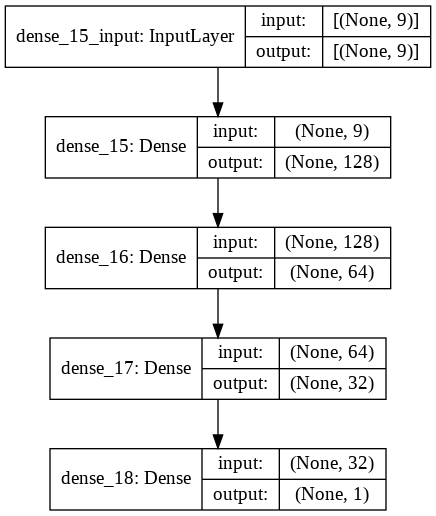

In [ ]:
tf.keras.utils.plot_model(
    model, show_shapes=True, 
    show_layer_names=True)

In [ ]:
model.compile(loss = 'binary_crossentropy',
optimizer='adam', metrics=['accuracy'])

Creamos variables para los hiperparámetros de tamaño de porción y para el número de épocas

In [ ]:
batch_size=32
epochs=35

###Caso 1: Tamaño de porción:32, Número de épocas=35

Se entrena el modelo

In [ ]:
r = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
 validation_data=(x_test,y_test))

Epoch 1/35
23/23 [==============================] - 1s 13ms/step - loss: 0.6285 - accuracy: 0.7069 - val_loss: 0.5228 - val_accuracy: 0.8258
Epoch 2/35
23/23 [==============================] - 0s 6ms/step - loss: 0.4841 - accuracy: 0.8050 - val_loss: 0.4109 - val_accuracy: 0.8315
Epoch 3/35
23/23 [==============================] - 0s 5ms/step - loss: 0.4266 - accuracy: 0.8191 - val_loss: 0.3973 - val_accuracy: 0.8371
Epoch 4/35
23/23 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8317 - val_loss: 0.3982 - val_accuracy: 0.8315
Epoch 5/35
23/23 [==============================] - 0s 5ms/step - loss: 0.4035 - accuracy: 0.8373 - val_loss: 0.4057 - val_accuracy: 0.8258
Epoch 6/35
23/23 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8303 - val_loss: 0.4009 - val_accuracy: 0.8315
Epoch 7/35
23/23 [==============================] - 0s 5ms/step - loss: 0.3922 - accuracy: 0.8345 - val_loss: 0.4072 - val_accuracy: 0.8315
Epoch 8/35
23/23 [=

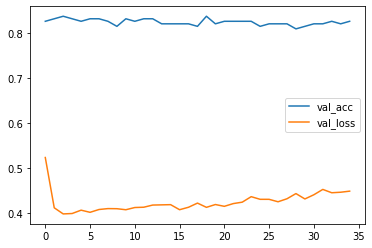

In [ ]:
%matplotlib inline
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred_raw = model.predict(x_test)
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]

In [ ]:
df_metrics_nn = cuts(y_pred_raw)
df_metrics_nn.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Cut,Accuracy,Recall,Precision,F1
523,0.523,0.825843,0.690141,0.844828,0.75969
524,0.524,0.825843,0.690141,0.844828,0.75969
525,0.525,0.825843,0.690141,0.844828,0.75969
526,0.526,0.825843,0.690141,0.844828,0.75969
527,0.527,0.825843,0.690141,0.844828,0.75969
528,0.528,0.825843,0.690141,0.844828,0.75969
529,0.529,0.825843,0.690141,0.844828,0.75969
530,0.530,0.825843,0.690141,0.844828,0.75969
531,0.531,0.825843,0.690141,0.844828,0.75969
532,0.532,0.825843,0.690141,0.844828,0.75969


###Caso 2: Tamaño de porción:64, Número de épocas=35

In [ ]:
batch_size=64
epochs=35

Se entrena el modelo

In [ ]:
r = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
 validation_data=(x_test,y_test))

Epoch 1/35
12/12 [==============================] - 0s 10ms/step - loss: 0.3265 - accuracy: 0.8668 - val_loss: 0.4498 - val_accuracy: 0.8202
Epoch 2/35
12/12 [==============================] - 0s 7ms/step - loss: 0.3270 - accuracy: 0.8668 - val_loss: 0.4494 - val_accuracy: 0.8146
Epoch 3/35
12/12 [==============================] - 0s 6ms/step - loss: 0.3226 - accuracy: 0.8640 - val_loss: 0.4518 - val_accuracy: 0.8258
Epoch 4/35
12/12 [==============================] - 0s 8ms/step - loss: 0.3203 - accuracy: 0.8612 - val_loss: 0.4555 - val_accuracy: 0.8146
Epoch 5/35
12/12 [==============================] - 0s 6ms/step - loss: 0.3197 - accuracy: 0.8654 - val_loss: 0.4675 - val_accuracy: 0.8202
Epoch 6/35
12/12 [==============================] - 0s 6ms/step - loss: 0.3213 - accuracy: 0.8668 - val_loss: 0.4676 - val_accuracy: 0.8090
Epoch 7/35
12/12 [==============================] - 0s 7ms/step - loss: 0.3331 - accuracy: 0.8668 - val_loss: 0.4554 - val_accuracy: 0.8146
Epoch 8/35
12/12 [=

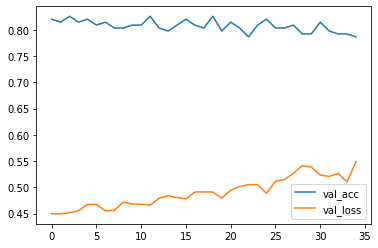

In [ ]:
%matplotlib inline
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred_raw = model.predict(x_test)
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]

In [ ]:
df_metrics_nn = cuts(y_pred_raw)
df_metrics_nn.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,Cut,Accuracy,Recall,Precision,F1
715,0.715,0.808989,0.633803,0.849057,0.725806
716,0.716,0.808989,0.633803,0.849057,0.725806
717,0.717,0.808989,0.633803,0.849057,0.725806
718,0.718,0.808989,0.633803,0.849057,0.725806
719,0.719,0.808989,0.633803,0.849057,0.725806
720,0.720,0.808989,0.633803,0.849057,0.725806
721,0.721,0.808989,0.633803,0.849057,0.725806
722,0.722,0.808989,0.633803,0.849057,0.725806
723,0.723,0.808989,0.633803,0.849057,0.725806
724,0.724,0.808989,0.633803,0.849057,0.725806


###Caso 3: Tamaño de porción:32, Número de épocas=50

In [ ]:
batch_size=32
epochs=50

Se entrena el modelo

In [ ]:
r = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
 validation_data=(x_test,y_test))

Epoch 1/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3095 - accuracy: 0.8724 - val_loss: 0.5483 - val_accuracy: 0.7978
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3037 - accuracy: 0.8822 - val_loss: 0.5221 - val_accuracy: 0.7921
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.2970 - accuracy: 0.8766 - val_loss: 0.5737 - val_accuracy: 0.7978
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.8724 - val_loss: 0.5489 - val_accuracy: 0.8090
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.3172 - accuracy: 0.8640 - val_loss: 0.5650 - val_accuracy: 0.7865
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3057 - accuracy: 0.8738 - val_loss: 0.5265 - val_accuracy: 0.8090
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.2958 - accuracy: 0.8738 - val_loss: 0.5514 - val_accuracy: 0.8090
Epoch 8/50
23/23 [==

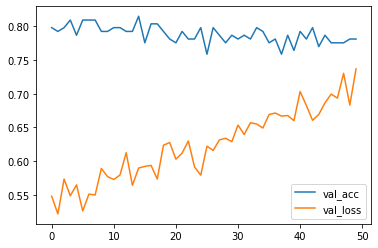

In [ ]:
%matplotlib inline
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
y_pred_raw = model.predict(x_test)
y_pred_raw = [[1-x[0],x[0]] for x in y_pred_raw]

In [ ]:
df_metrics_nn = cuts(y_pred_raw)
df_metrics_nn.sort_values(by=['Accuracy', 'Precision'], ascending=False).head(10)

,Cut,Accuracy,Recall,Precision,F1
605,0.605,0.786517,0.676056,0.761905,0.716418
606,0.606,0.786517,0.676056,0.761905,0.716418
607,0.607,0.786517,0.676056,0.761905,0.716418
608,0.608,0.786517,0.676056,0.761905,0.716418
609,0.609,0.786517,0.676056,0.761905,0.716418
610,0.610,0.786517,0.676056,0.761905,0.716418
611,0.611,0.786517,0.676056,0.761905,0.716418
612,0.612,0.786517,0.676056,0.761905,0.716418
613,0.613,0.786517,0.676056,0.761905,0.716418
614,0.614,0.786517,0.676056,0.761905,0.716418
